# Allen Institute Visual Behavior 2P dataset overview
### This dataset consists of neural activity measured with 2-photon calcium imaging in the visual cortex of mice performing an image change detection task.
##### In this task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward.


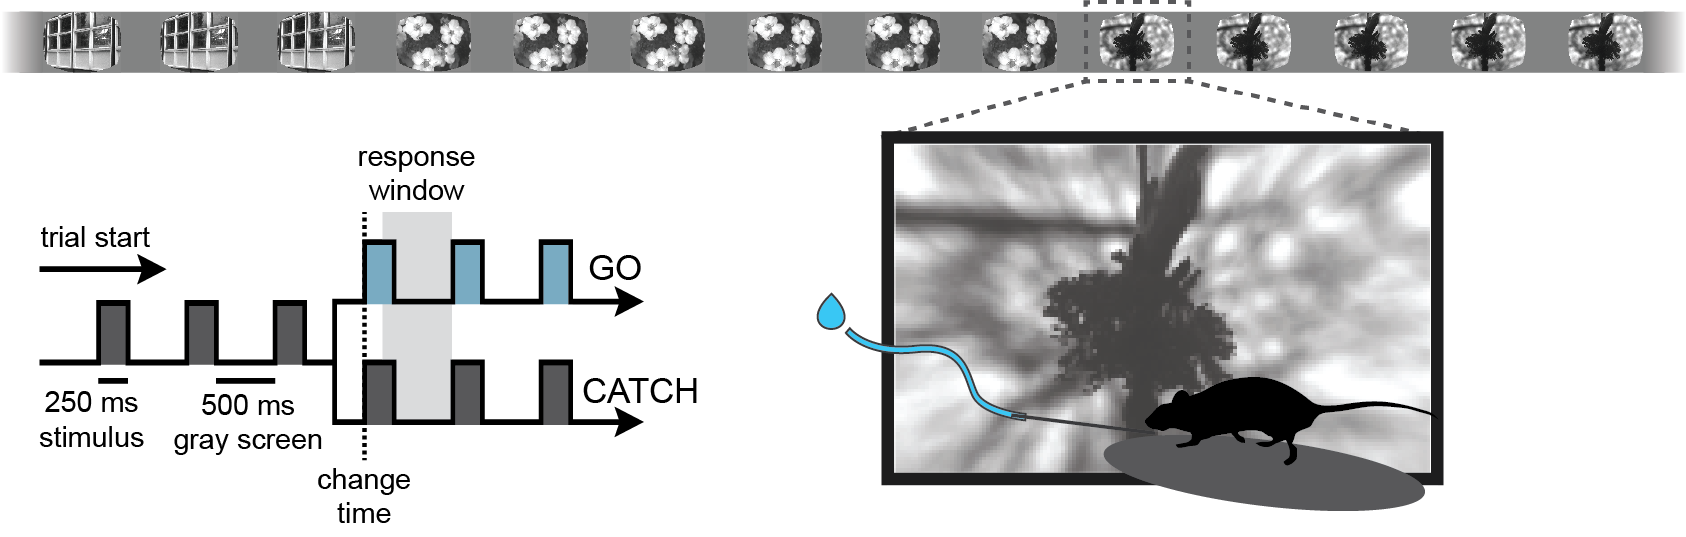

##### In some sessions, the mice perform the task with familiar images they have seen many times during training. In other sessions, mice perform the task with novel images.
##### During 2-photon imaging sessions, 5% of stimulus presentations are randomly omitted, allowing us to examine the effect of unexpected events on neural activity.
##### The same population of cells is imaged over multiple days with varying sensory and behavioral conditions.


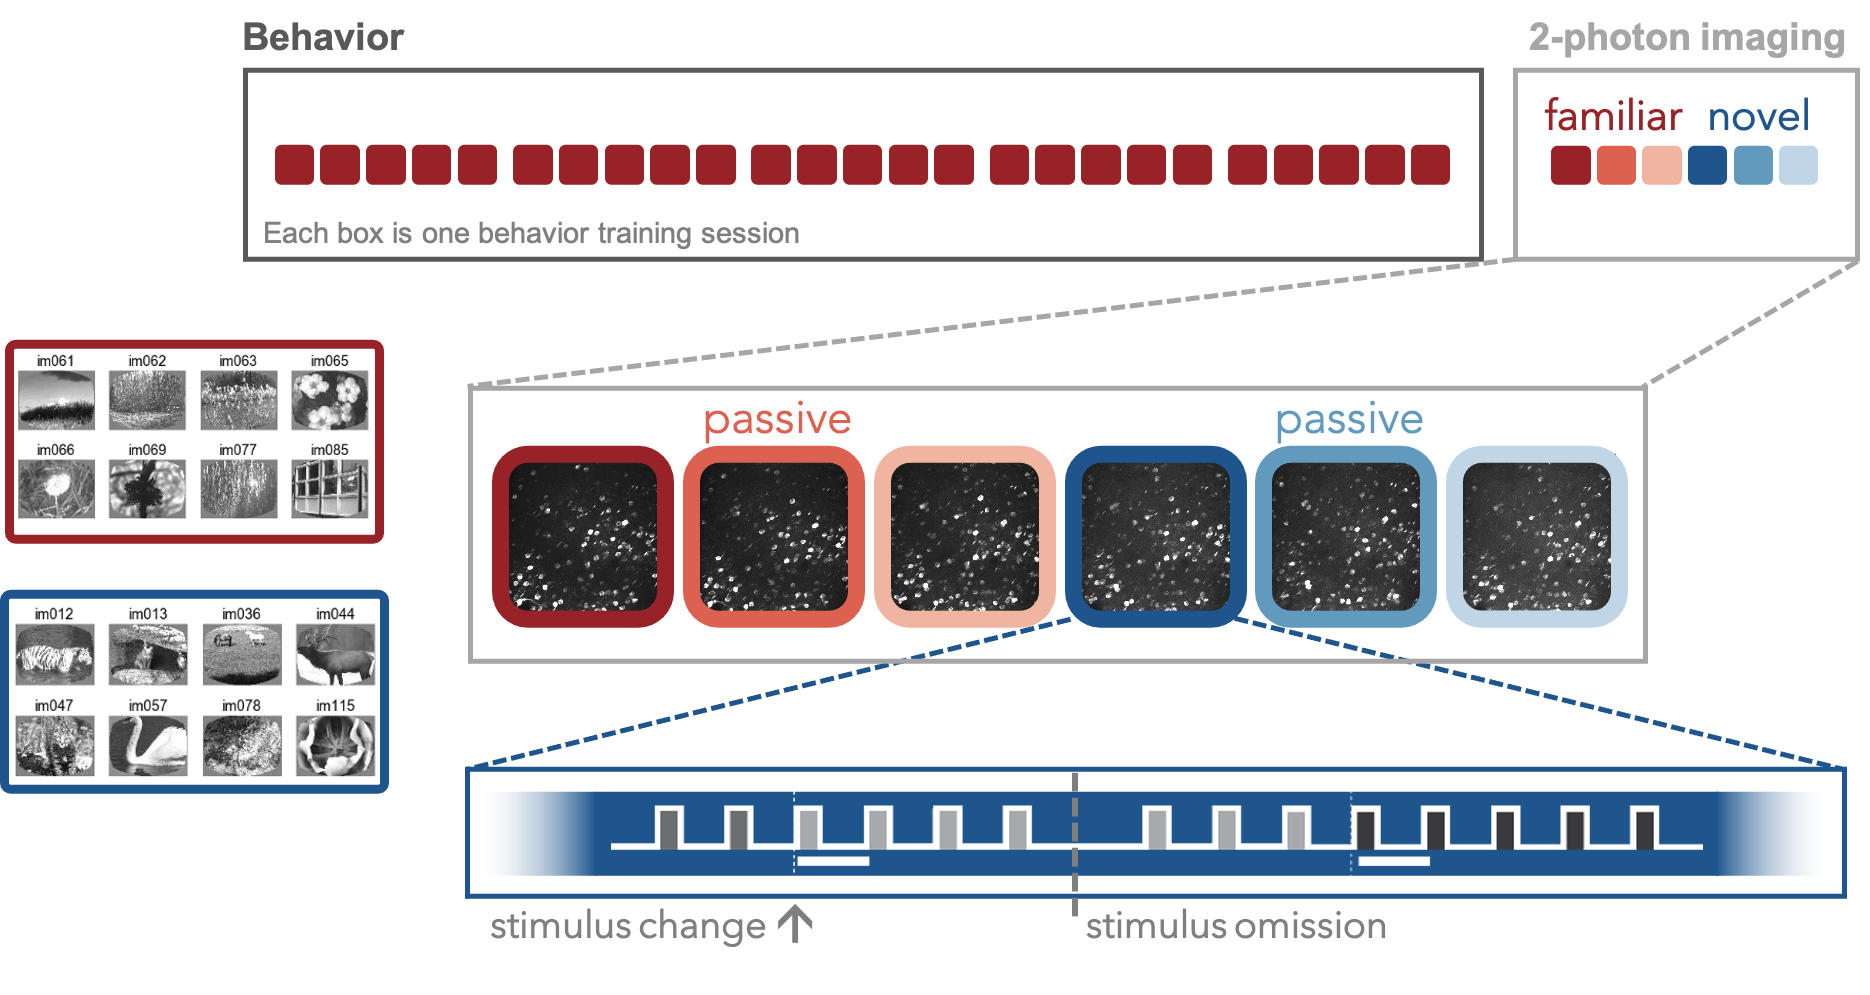

##### Multiple cortical areas and depths were measured concurently in each session, at a sample rate of 11Hz.
##### Data was collected from excitatory and inhibitory neural populations.


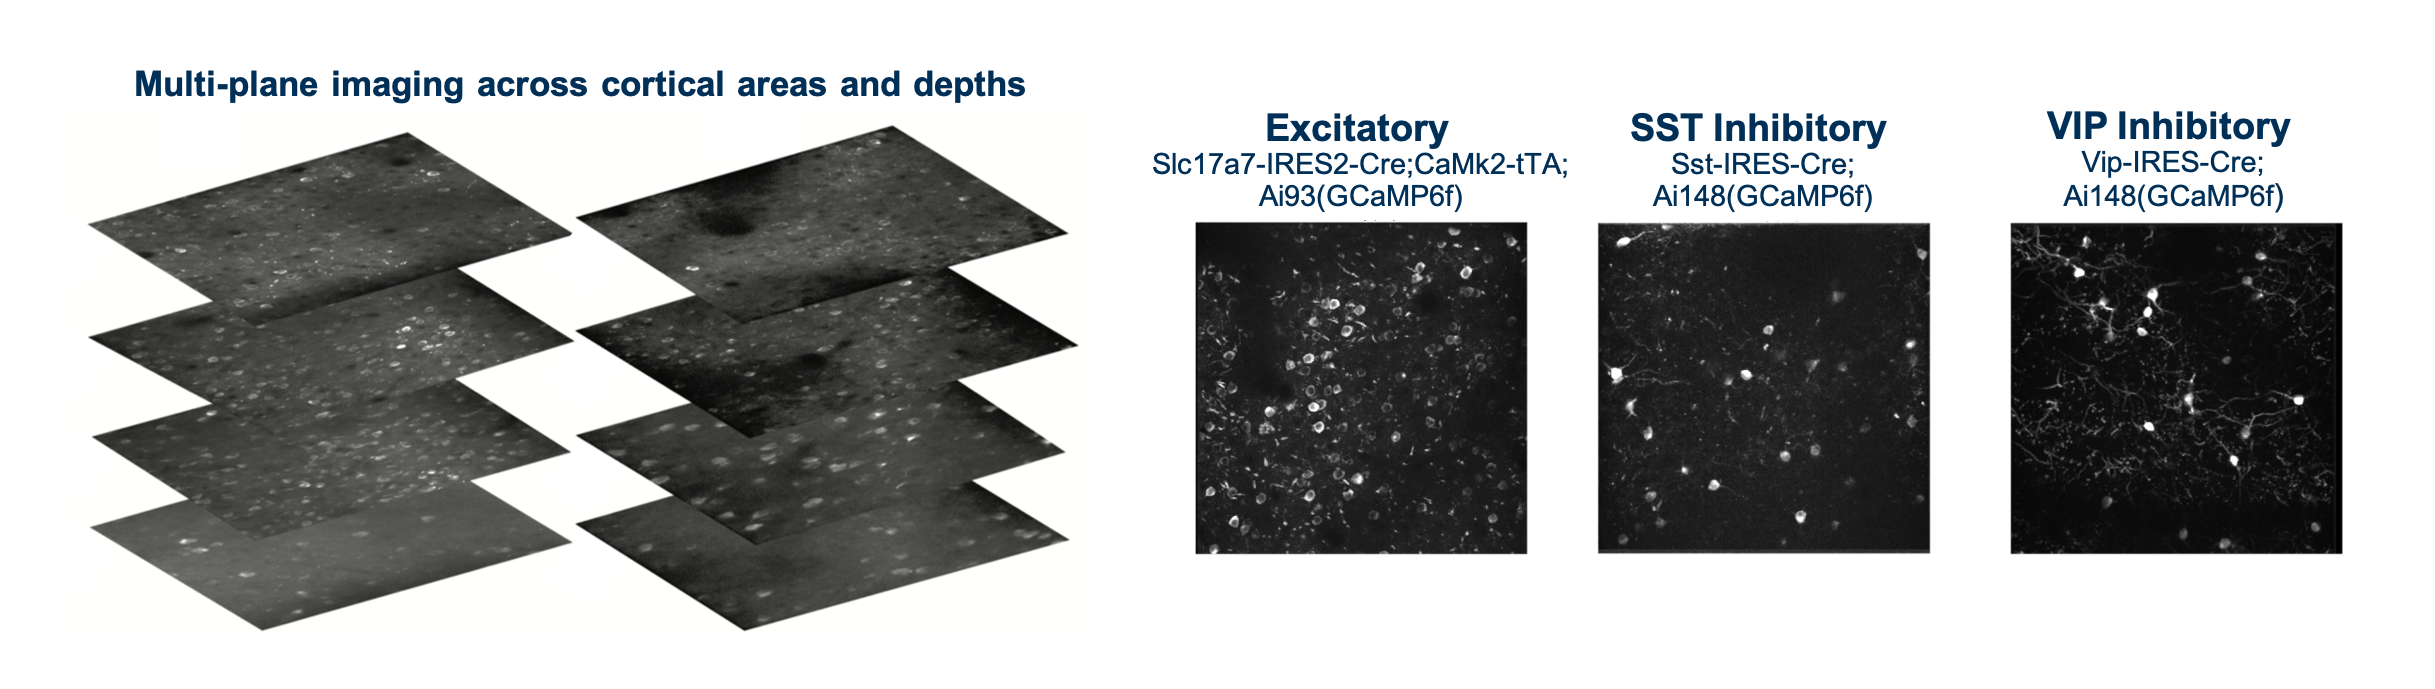

#### This example will focus on the activity of the two inhibitory types - VIP and SST neurons.

# Loading the data

In [ ]:
# @title Install dependencies

%pip install pandas --quiet
%pip install seaborn --quiet
%pip install pyarrow 
%pip install scikit-learn
%pip install imblearn

In [382]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

## For this example, we have pre-computed event triggered responses and saved them to figshare.
#### To access the full dataset, see `Allen_neuromatch_example_2.ipynb`, or go to the links at the bottom of this notebook
### This cell will download the responses.

In [383]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

### Then we open it using the pandas `read_parquet` method


(parquet is just another file format)

In [384]:
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

#### The data is organized as a pandas dataframe.
#### Each row contains all data for a given cell on a given trial


In [385]:
data.sample(5)

stimulus_presentations_id  cell_specimen_id  \
1493641                       3434        1086565788   
603063                        1666        1086501538   
276713                        3268        1086491848   
1454808                       2324        1086565124   
1492504                       3401        1086567589   

                                                     trace  \
1493641  [0.007467891555279493, 0.006334776058793068, 0...   
603063   [0.04829154908657074, -0.00689280079677701, 0....   
276713   [0.05510258674621582, -0.0909389853477478, 0.0...   
1454808  [-0.019221367314457893, -0.02164253033697605, ...   
1492504  [-0.13845530152320862, 0.052532173693180084, -...   

                                          trace_timestamps  mean_response  \
1493641  [-1.2282367960132226, -1.1959147750655061, -1....       0.001005   
603063   [-1.2279815442797712, -1.1956662404829352, -1....       0.321547   
276713   [-1.2281077102807074, -1.195789086325952, -1.1...      -0.003414   
1454808  [-1.2282367960132226, -1.1959147750655061, -1....       0.013440   
1492504  [-1.2282367960132226, -1.1959147750655061, -1....       0.005420   

         baseline_response image_name  image_index  is_change  omitted  ...  \
1493641          -0.012322      im085            6       True    False  ...   
603063           -0.095049      im066            2       True    False  ...   
276713            0.058717    omitted            8      False     True  ...   
1454808           0.011150    omitted            8      False     True  ...   
1492504          -0.012720    omitted            8      False     True  ...   

         ophys_session_id  ophys_container_id  behavior_session_id  \
1493641        1005018474          1000740620           1005032062   
603063          993668836           991913246            993691759   
276713          933463604           928325203            933830753   
1454808        1005018474          1000740620           1005032062   
1492504        1005018474          1000740620           1005032062   

                                         full_genotype  \
1493641  Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
603063   Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
276713   Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
1454808  Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
1492504  Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   

                      reporter_line     driver_line indicator sex age_in_days  \
1493641  Ai148(TIT2L-GC6f-ICL-tTA2)  [Vip-IRES-Cre]   GCaMP6f   F       166.0   
603063   Ai148(TIT2L-GC6f-ICL-tTA2)  [Vip-IRES-Cre]   GCaMP6f   F       129.0   
276713   Ai148(TIT2L-GC6f-ICL-tTA2)  [Vip-IRES-Cre]   GCaMP6f   M       134.0   
1454808  Ai148(TIT2L-GC6f-ICL-tTA2)  [Vip-IRES-Cre]   GCaMP6f   F       166.0   
1492504  Ai148(TIT2L-GC6f-ICL-tTA2)  [Vip-IRES-Cre]   GCaMP6f   F       166.0   

         exposure_level  
1493641           novel  
603063            novel  
276713         familiar  
1454808           novel  
1492504           novel  

[5 rows x 31 columns]

Before beginning statistical analysis and visualization, it's important to identify the key information needed in the dataset and determine which data can be temporarily excluded to focus on relevant insights. Additionally, considering which columns or labels should be added—such as meaningful categories, experimental conditions, or derived metrics—can enhance clarity and provide a better understanding of the relationships within the data. This step ensures the analysis is both focused and comprehensive. In our case, we decided to remove the columns "imaging_depth," "targeted_structures," "sex," and "ages_in_days" to streamline the dataset and focus on the most relevant variables. Additionally, we added the labels "animal_in_image" and "close_proximity," which categorize the images into true or false based on general approximation and manual inspection of the images. This preprocessing step ensures the data is more aligned with the specific goals of our analysis.

In [130]:
# Print the number and names of columns before removal
print("Number of columns before removal:", len(data.columns))
print("Columns before removal:")
print(data.columns.tolist())


Number of columns before removal: 31
Columns before removal:
['stimulus_presentations_id', 'cell_specimen_id', 'trace', 'trace_timestamps', 'mean_response', 'baseline_response', 'image_name', 'image_index', 'is_change', 'omitted', 'mean_running_speed', 'mean_pupil_area', 'response_latency', 'rewarded', 'ophys_experiment_id', 'imaging_depth', 'targeted_structure', 'cre_line', 'session_type', 'session_number', 'mouse_id', 'ophys_session_id', 'ophys_container_id', 'behavior_session_id', 'full_genotype', 'reporter_line', 'driver_line', 'indicator', 'sex', 'age_in_days', 'exposure_level']


In [131]:
# Print the number of columns before removal
print("Number of columns before removal:", len(data.columns))

# List of columns to remove
columns_to_remove = ['imaging_depth', 'targeted_structure', 'sex', 'ages_in_days']

# Remove specified columns from the dataset (ignore errors if column is not found)
data.drop(columns=columns_to_remove, inplace=True, errors='ignore')

# Print the list of columns after removal
print("\nColumns after removal:")
print(data.columns.tolist())


Number of columns before removal: 31

Columns after removal:
['stimulus_presentations_id', 'cell_specimen_id', 'trace', 'trace_timestamps', 'mean_response', 'baseline_response', 'image_name', 'image_index', 'is_change', 'omitted', 'mean_running_speed', 'mean_pupil_area', 'response_latency', 'rewarded', 'ophys_experiment_id', 'cre_line', 'session_type', 'session_number', 'mouse_id', 'ophys_session_id', 'ophys_container_id', 'behavior_session_id', 'full_genotype', 'reporter_line', 'driver_line', 'indicator', 'age_in_days', 'exposure_level']


In [132]:
# Get unique image names starting with 'im'
unique_image_names = data[data['image_name'].str.startswith('im')]['image_name'].unique()

# Print unique image names that start with 'im'
print("Unique image names starting with 'im':")
print(unique_image_names)

# Count and print the number of unique image names starting with 'im'
unique_image_count = len(unique_image_names)
print("\nNumber of unique images starting with 'im':", unique_image_count)


Unique image names starting with 'im':
['im075' 'im000' 'im054' 'im035' 'im045' 'im106' 'im073' 'im031' 'im066'
 'im085' 'im062' 'im069' 'im077' 'im063' 'im061' 'im065']

Number of unique images starting with 'im': 16


In [133]:
# List of specific animal image names
animal_images = ["im000", "im035", "im045", "im054"]

# Create a new column 'animal_in_image' based on whether the 'image_name' is in the animal_images list
data['animal_in_image'] = data['image_name'].apply(lambda x: x in animal_images)

# Print the 'image_name' and 'animal_in_image' columns of the first few rows
print(data[['image_name', 'animal_in_image']].head())


   image_name  animal_in_image
85      im075            False
86      im075            False
87      im075            False
88      im075            False
89      im075            False


In [134]:
# List of specific image names that are considered "close proximity"
close_proximity_images = ["im106", "im075", "im073", "im035", "im065", "im066", "im069"]

# Create a new column 'close_proximity' based on whether the 'image_name' is in the close_proximity_images list
data['close_proximity'] = data['image_name'].apply(lambda x: x in close_proximity_images)

# Print the 'image_name' and 'close_proximity' columns of the first few rows
print(data[['image_name', 'close_proximity']].head())


   image_name  close_proximity
85      im075             True
86      im075             True
87      im075             True
88      im075             True
89      im075             True


In [135]:
# Save the cleaned data as a CSV file
csv_file = 'data.csv'
data.to_csv(csv_file, index=False)

# Print a confirmation message
print("Converted data.parquet to data.csv")

Converted data.parquet to data.csv


In [136]:
# List of numeric columns to normalize
numeric_columns = ['mean_response', 'mean_pupil_area', 'mean_running_speed']

# Create a copy of the original data
temp_data = data.copy()

# Normalize the numeric columns: subtract mean and divide by standard deviation (z-score normalization)
temp_data[numeric_columns] = (temp_data[numeric_columns] - temp_data[numeric_columns].mean()) / temp_data[numeric_columns].std()

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

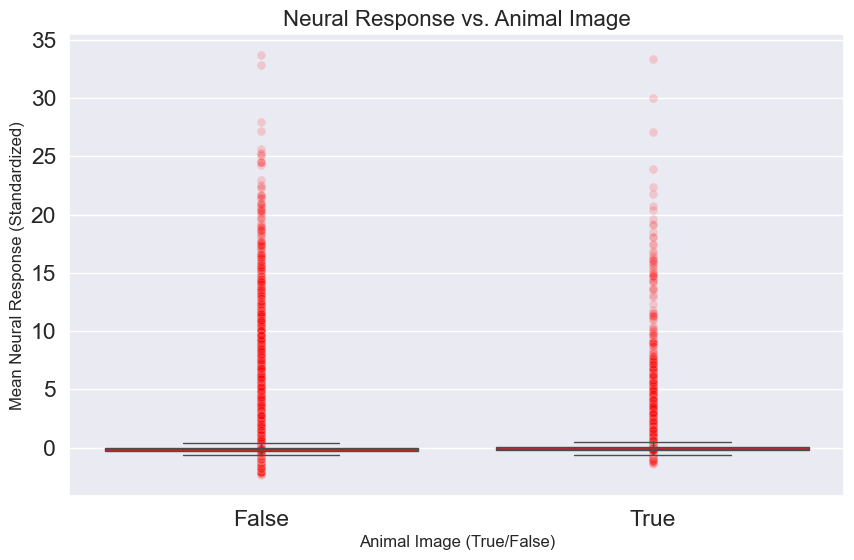

                  count      mean    median       std
animal_in_image                                      
False            121016 -0.015614 -0.158245  0.999329
True              26679  0.070824 -0.096973  0.999999


In [138]:
# Create a boxplot to show distribution of 'mean_response' by 'animal_in_image' category
plt.figure(figsize=(10, 6))
sns.boxplot(x='animal_in_image', y='mean_response', data=temp_data, color='red', showfliers=False)

# Add a scatterplot to overlay individual data points
sns.scatterplot(x='animal_in_image', y='mean_response', data=temp_data, color='red', s=40, alpha=0.15)

# Add titles and labels to the plot
plt.title('Neural Response vs. Animal Image', fontsize=16)
plt.xlabel('Animal Image (True/False)', fontsize=12)
plt.ylabel('Mean Neural Response (Standardized)', fontsize=12)

# Display the plot
plt.show()

# Group the data by 'animal_in_image' and calculate statistics for 'mean_response'
stats = temp_data.groupby('animal_in_image')['mean_response'].agg(['count', 'mean', 'median', 'std'])

# Print the calculated statistics
print(stats)

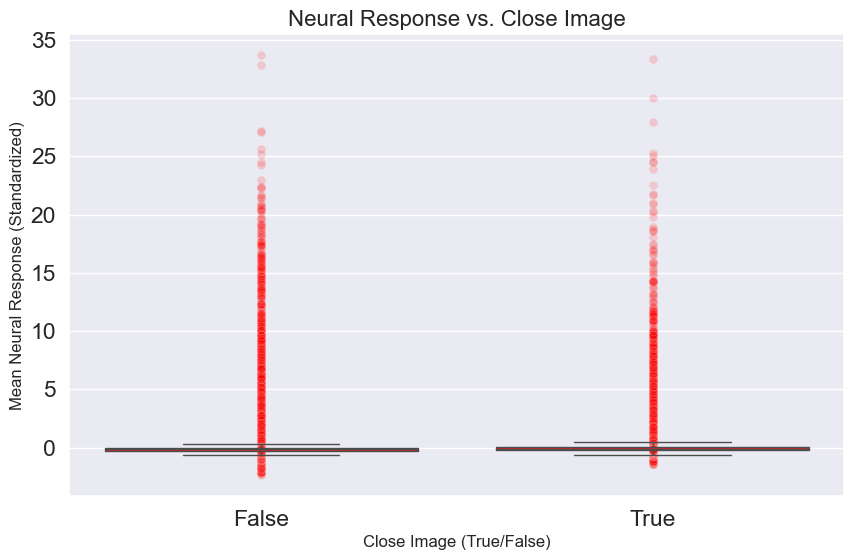

                  count      mean    median       std
close_proximity                                      
False            109010 -0.037703 -0.165523  0.962118
True              38685  0.106242 -0.096398  1.092787


In [139]:
# Create a boxplot to show distribution of 'mean_response' by 'close_proximity' category
plt.figure(figsize=(10, 6))
sns.boxplot(x='close_proximity', y='mean_response', data=temp_data, color='red', showfliers=False)

# Add a scatterplot to overlay individual data points
sns.scatterplot(x='close_proximity', y='mean_response', data=temp_data, color='red', s=40, alpha=0.15)

# Add titles and labels to the plot
plt.title('Neural Response vs. Close Image', fontsize=16)
plt.xlabel('Close Image (True/False)', fontsize=12)
plt.ylabel('Mean Neural Response (Standardized)', fontsize=12)

# Display the plot
plt.show()

# Group the data by 'close_proximity' and calculate statistics for 'mean_response'
stats = temp_data.groupby('close_proximity')['mean_response'].agg(['count', 'mean', 'median', 'std'])

# Print the calculated statistics
print(stats)

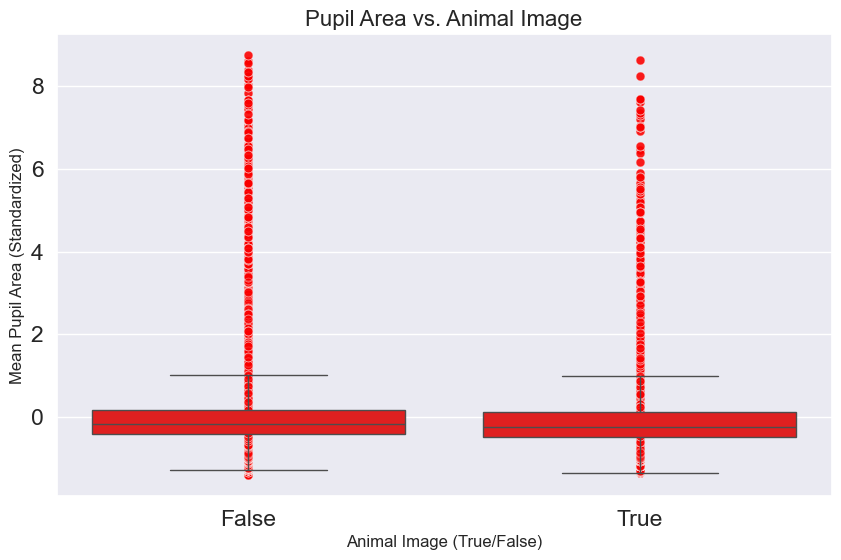

                  count      mean    median       std
animal_in_image                                      
False            117513 -0.003335 -0.182068  0.959303
True              25599  0.015311 -0.237643  1.168676


In [140]:
# Create a boxplot to show distribution of 'mean_pupil_area' by 'animal_in_image' category
plt.figure(figsize=(10, 6))
sns.boxplot(x='animal_in_image', y='mean_pupil_area', data=temp_data, color='red', showfliers=False)

# Add a scatterplot to overlay individual data points
sns.scatterplot(x='animal_in_image', y='mean_pupil_area', data=temp_data, color='red', s=40, alpha=0.15)

# Add titles and labels to the plot
plt.title('Pupil Area vs. Animal Image', fontsize=16)
plt.xlabel('Animal Image (True/False)', fontsize=12)
plt.ylabel('Mean Pupil Area (Standardized)', fontsize=12)

# Display the plot
plt.show()

# Group the data by 'animal_in_image' and calculate statistics for 'mean_pupil_area'
stats = temp_data.groupby('animal_in_image')['mean_pupil_area'].agg(['count', 'mean', 'median', 'std'])

# Print the calculated statistics
print(stats)

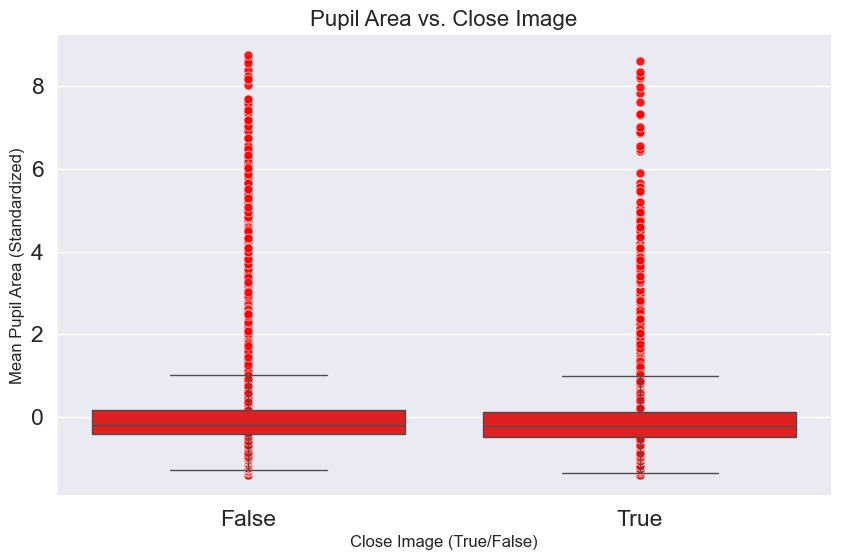

                  count      mean    median       std
close_proximity                                      
False            105436  0.014742 -0.183812  1.002731
True              37676 -0.041255 -0.217639  0.991167


In [141]:
# Create a boxplot to show the distribution of 'mean_pupil_area' by 'close_proximity' category
plt.figure(figsize=(10, 6))
sns.boxplot(x='close_proximity', y='mean_pupil_area', data=temp_data, color='red', showfliers=False)

# Add a scatterplot to overlay individual data points on the boxplot
sns.scatterplot(x='close_proximity', y='mean_pupil_area', data=temp_data, color='red', s=40, alpha=0.15)

# Customize plot titles and axis labels
plt.title('Pupil Area vs. Close Image', fontsize=16)
plt.xlabel('Close Image (True/False)', fontsize=12)
plt.ylabel('Mean Pupil Area (Standardized)', fontsize=12)

# Show the plot
plt.show()

# Group the data by 'close_proximity' and calculate statistics for 'mean_pupil_area'
stats = temp_data.groupby('close_proximity')['mean_pupil_area'].agg(['count', 'mean', 'median', 'std'])

# Print the calculated statistics
print(stats)

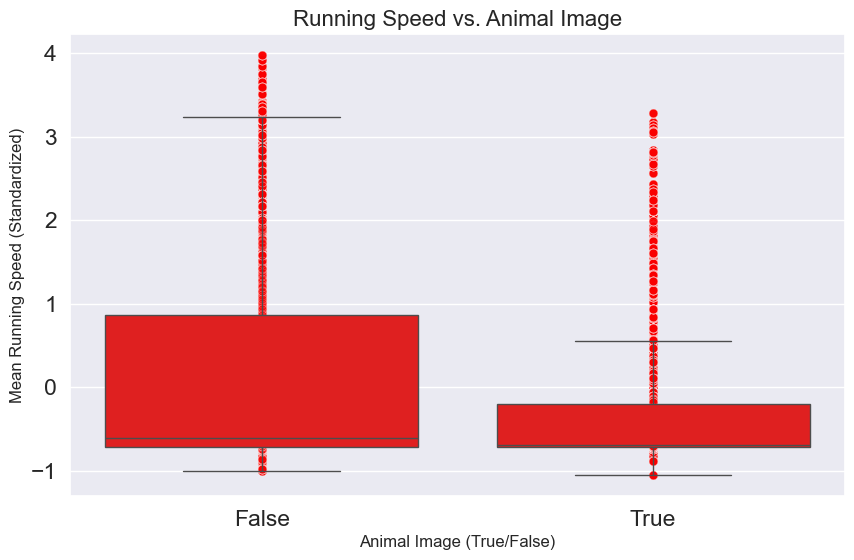

                  count      mean    median       std
animal_in_image                                      
False            121016  0.052523 -0.613171  1.023249
True              26679 -0.238246 -0.697596  0.846986


In [142]:
# Create a boxplot to show the distribution of 'mean_running_speed' by 'animal_in_image' category
plt.figure(figsize=(10, 6))
sns.boxplot(x='animal_in_image', y='mean_running_speed', data=temp_data, color='red', showfliers=False)

# Add a scatterplot to overlay individual data points on the boxplot
sns.scatterplot(x='animal_in_image', y='mean_running_speed', data=temp_data, color='red', s=40, alpha=0.15)

# Customize the plot with title and axis labels
plt.title('Running Speed vs. Animal Image', fontsize=16)
plt.xlabel('Animal Image (True/False)', fontsize=12)
plt.ylabel('Mean Running Speed (Standardized)', fontsize=12)

# Display the plot
plt.show()

# Group the data by 'animal_in_image' and calculate statistics for 'mean_running_speed'
stats = temp_data.groupby('animal_in_image')['mean_running_speed'].agg(['count', 'mean', 'median', 'std'])

# Print the calculated statistics
print(stats)

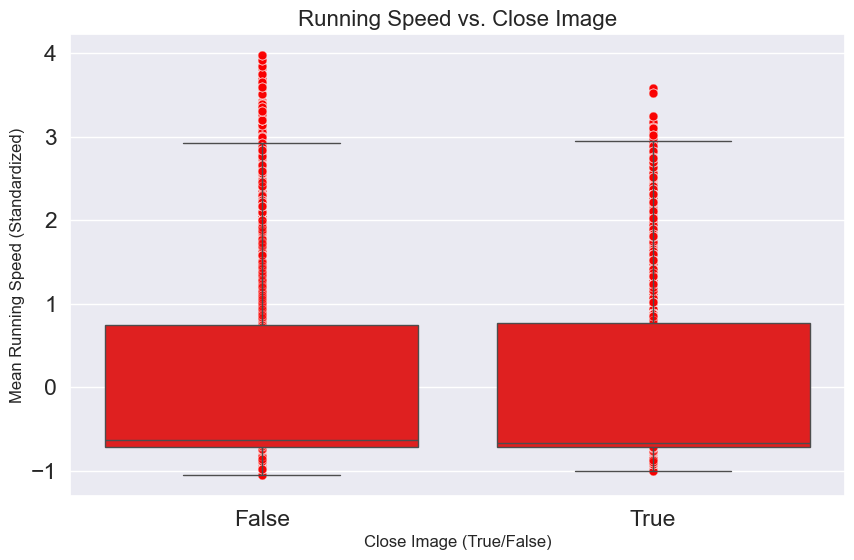

                  count      mean    median       std
close_proximity                                      
False            109010  0.001125 -0.637353  1.002862
True              38685 -0.003169 -0.666483  0.991898


In [143]:
# Create a boxplot to show the distribution of 'mean_running_speed' by 'close_proximity' category
plt.figure(figsize=(10, 6))
sns.boxplot(x='close_proximity', y='mean_running_speed', data=temp_data, color='red', showfliers=False)

# Add a scatterplot to overlay individual data points on the boxplot
sns.scatterplot(x='close_proximity', y='mean_running_speed', data=temp_data, color='red', s=40, alpha=0.15)

# Customize the plot with title and axis labels
plt.title('Running Speed vs. Close Image', fontsize=16)
plt.xlabel('Close Image (True/False)', fontsize=12)
plt.ylabel('Mean Running Speed (Standardized)', fontsize=12)

# Display the plot
plt.show()

# Group the data by 'close_proximity' and calculate statistics for 'mean_running_speed'
stats = temp_data.groupby('close_proximity')['mean_running_speed'].agg(['count', 'mean', 'median', 'std'])

# Print the calculated statistics
print(stats)


The red graphs show that neural responses are similar across conditions, regardless of whether animals are present or images are perceived as close. Pupil size also remains consistent for "animal = true" and "animal = false," though the average it is slightly larger when "proximity = false" compared to "proximity = true." Running speed, on the other hand, is higher for "animal = false" than "animal = true," while proximity does not appear to significantly influence running behavior. These findings are unexpected, as one might anticipate stronger neural and behavioral differences based on the presence of animals or proximity. One would recommend revisiting the data and applying alternative analysis techniques to confirm and better understand these results.

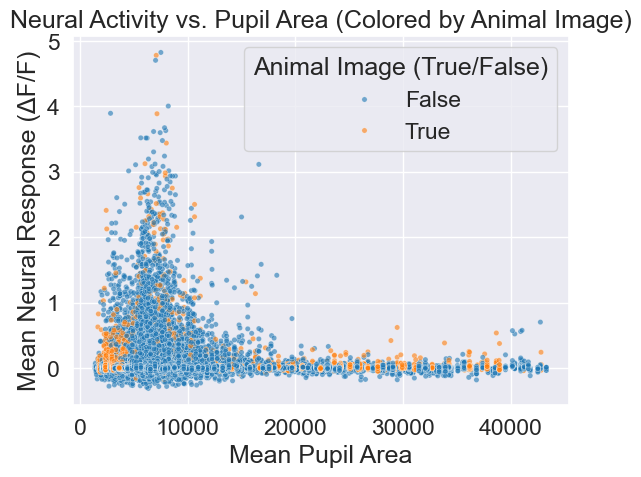

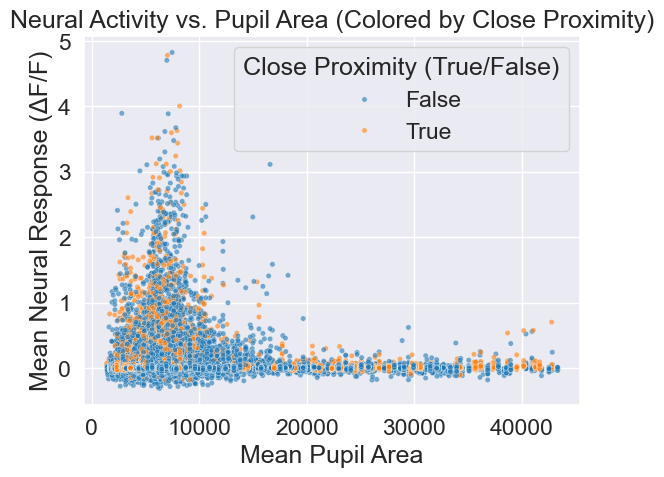

In [144]:
# Scatter plot of 'mean_pupil_area' vs. 'mean_response', colored by 'animal_in_image'
sns.scatterplot(x='mean_pupil_area', y='mean_response', hue='animal_in_image', data=data, s=15, alpha=0.6)

# Add title, labels, and legend
plt.title('Neural Activity vs. Pupil Area (Colored by Animal Image)')
plt.xlabel('Mean Pupil Area')
plt.ylabel('Mean Neural Response (ΔF/F)')
plt.legend(title='Animal Image (True/False)')

# Display the plot
plt.show()

# Scatter plot of 'mean_pupil_area' vs. 'mean_response', colored by 'close_proximity'
sns.scatterplot(x='mean_pupil_area', y='mean_response', hue='close_proximity', data=data, s=15, alpha=0.6)

# Add title, labels, and legend
plt.title('Neural Activity vs. Pupil Area (Colored by Close Proximity)')
plt.xlabel('Mean Pupil Area')
plt.ylabel('Mean Neural Response (ΔF/F)')
plt.legend(title='Close Proximity (True/False)')

# Display the plot
plt.show()

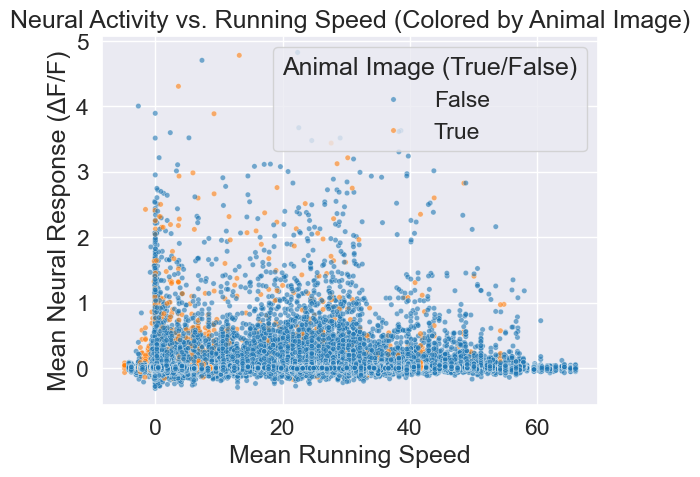

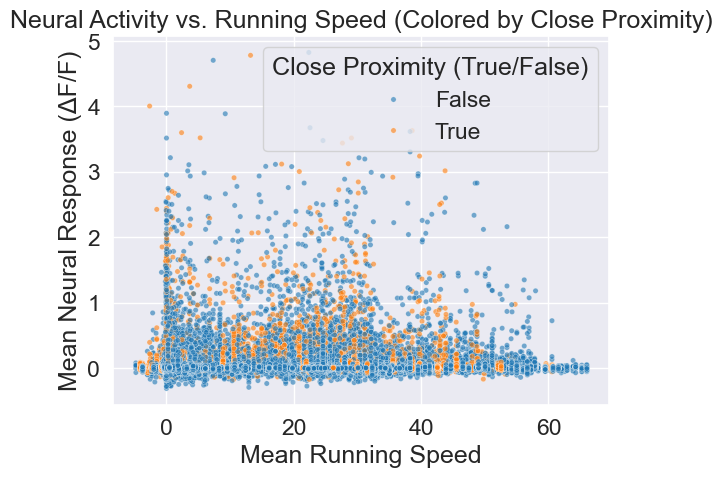

In [224]:
# Scatter plot of 'mean_running_speed' vs. 'mean_response', colored by 'animal_in_image'
sns.scatterplot(x='mean_running_speed', y='mean_response', hue='animal_in_image', data=data, s=15, alpha=0.6)

# Add title, labels, and legend
plt.title('Neural Activity vs. Running Speed (Colored by Animal Image)')
plt.xlabel('Mean Running Speed')
plt.ylabel('Mean Neural Response (ΔF/F)')
plt.legend(title='Animal Image (True/False)')

# Display the plot
plt.show()

# Scatter plot of 'mean_running_speed' vs. 'mean_response', colored by 'close_proximity'
sns.scatterplot(x='mean_running_speed', y='mean_response', hue='close_proximity', data=data, s=15, alpha=0.6)

# Add title, labels, and legend
plt.title('Neural Activity vs. Running Speed (Colored by Close Proximity)')
plt.xlabel('Mean Running Speed')
plt.ylabel('Mean Neural Response (ΔF/F)')
plt.legend(title='Close Proximity (True/False)')

# Display the plot
plt.show()

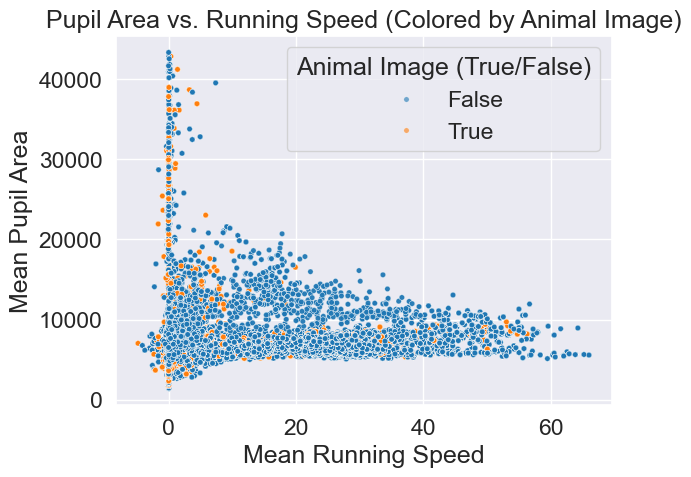

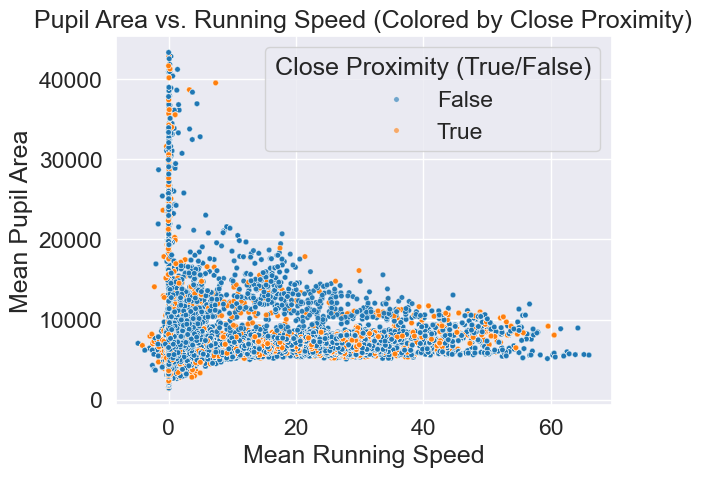

In [225]:
# Scatter plot of 'mean_running_speed' vs. 'mean_pupil_area', colored by 'animal_in_image'
sns.scatterplot(x='mean_running_speed', y='mean_pupil_area', hue='animal_in_image', data=data, s=15, alpha=0.6)

# Add title, labels, and legend
plt.title('Pupil Area vs. Running Speed (Colored by Animal Image)')
plt.xlabel('Mean Running Speed')
plt.ylabel('Mean Pupil Area')
plt.legend(title='Animal Image (True/False)')

# Display the plot
plt.show()

# Scatter plot of 'mean_running_speed' vs. 'mean_pupil_area', colored by 'close_proximity'
sns.scatterplot(x='mean_running_speed', y='mean_pupil_area', hue='close_proximity', data=data, s=15, alpha=0.6)

# Add title, labels, and legend
plt.title('Pupil Area vs. Running Speed (Colored by Close Proximity)')
plt.xlabel('Mean Running Speed')
plt.ylabel('Mean Pupil Area')
plt.legend(title='Close Proximity (True/False)')

# Display the plot
plt.show()

The six scatterplots examine the relationships between neural activity (ΔF/F), pupil area, and running speed, with points colored by the presence of animals or proximity classification. The plots do not show explicitly strong or clear trends, suggesting that neural activity, pupil size, and running speed are not strongly correlated in this dataset. This lack of apparent patterns indicates that the influence of animal presence or proximity on these variables may be minimal or more complex than expected. Further analysis may be needed to uncover subtle relationships or confirm these observations.

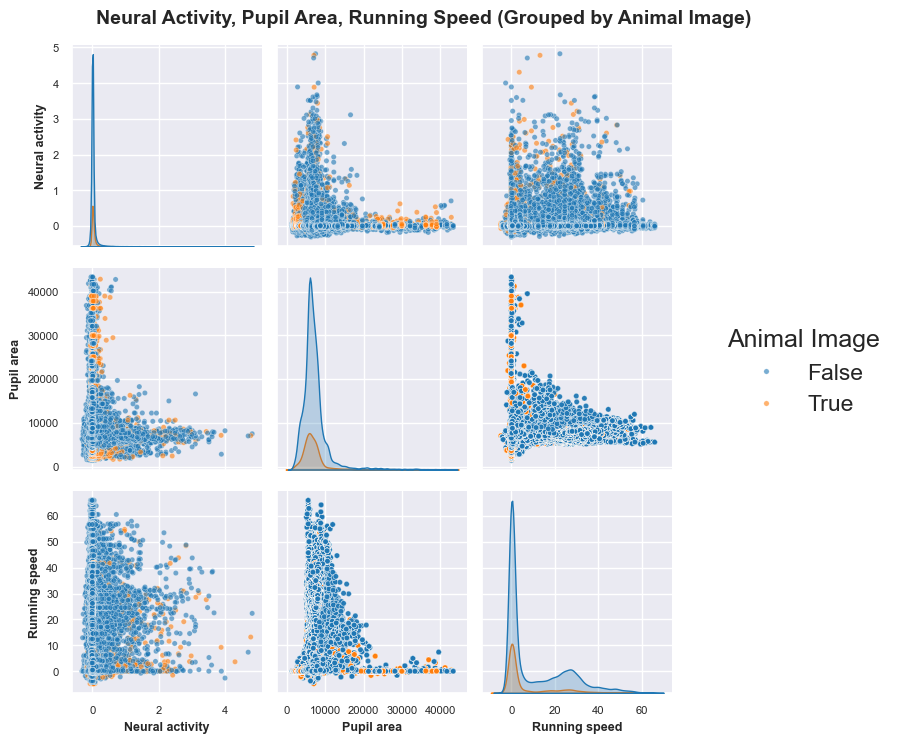

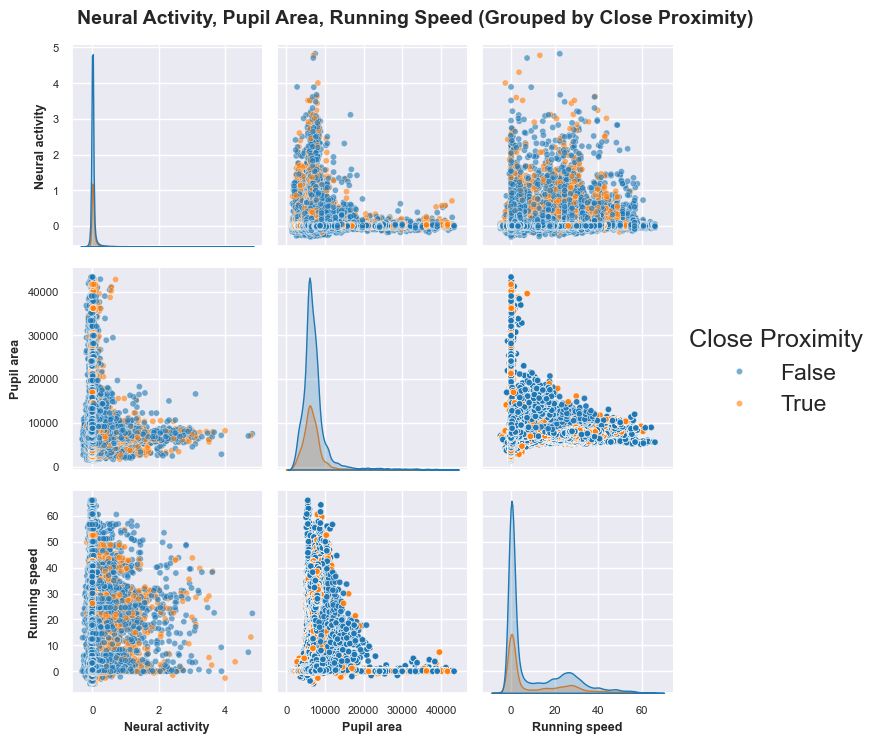

In [226]:
# Create a pairplot of selected variables, grouped by 'animal_in_image'
pairplot1 = sns.pairplot(data, 
                         vars=['mean_response', 'mean_pupil_area', 'mean_running_speed'], 
                         hue='animal_in_image',
                         plot_kws={'s': 15, 'alpha': 0.6}) 

# Set the title for the plot
plt.suptitle('Neural Activity, Pupil Area, Running Speed (Grouped by Animal Image)', y=1.02, fontsize=14, fontweight='bold')

# Customize the axis labels and tick sizes for better readability
for ax in plt.gcf().axes:
    if ax.get_xlabel() == 'mean_response':
        ax.set_xlabel('Neural activity', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_response':
        ax.set_ylabel('Neural activity', fontsize=9, fontweight='bold')
    if ax.get_xlabel() == 'mean_pupil_area':
        ax.set_xlabel('Pupil area', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_pupil_area':
        ax.set_ylabel('Pupil area', fontsize=9, fontweight='bold')
    if ax.get_xlabel() == 'mean_running_speed':
        ax.set_xlabel('Running speed', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_running_speed':
        ax.set_ylabel('Running speed', fontsize=9, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=8)

# Customize the legend title
pairplot1.legend.set_title('Animal Image')

# Display the plot
plt.show()


# Create a pairplot of selected variables, grouped by 'close_proximity'
pairplot2 = sns.pairplot(data, 
                         vars=['mean_response', 'mean_pupil_area', 'mean_running_speed'], 
                         hue='close_proximity',
                         plot_kws={'s': 20, 'alpha': 0.6}) 

# Set the title for the plot
plt.suptitle('Neural Activity, Pupil Area, Running Speed (Grouped by Close Proximity)', y=1.02, fontsize=14, fontweight='bold')

# Customize the axis labels and tick sizes for better readability
for ax in plt.gcf().axes:
    if ax.get_xlabel() == 'mean_response':
        ax.set_xlabel('Neural activity', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_response':
        ax.set_ylabel('Neural activity', fontsize=9, fontweight='bold')
    if ax.get_xlabel() == 'mean_pupil_area':
        ax.set_xlabel('Pupil area', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_pupil_area':
        ax.set_ylabel('Pupil area', fontsize=9, fontweight='bold')
    if ax.get_xlabel() == 'mean_running_speed':
        ax.set_xlabel('Running speed', fontsize=9, fontweight='bold')
    if ax.get_ylabel() == 'mean_running_speed':
        ax.set_ylabel('Running speed', fontsize=9, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=8)

# Customize the legend title
pairplot2.legend.set_title('Close Proximity')

# Display the plot
plt.show()

In [146]:
# Convert 'animal_in_image' and 'close_proximity' to integer type
temp_data['animal_in_image'] = temp_data['animal_in_image'].astype(int)
temp_data['close_proximity'] = temp_data['close_proximity'].astype(int)

# Print the first few rows of the converted columns to verify
print(temp_data[['animal_in_image', 'close_proximity']].head())

# Drop rows with missing values in specific columns
columns_to_check = ['mean_response', 'mean_pupil_area', 'mean_running_speed']
cleaned_data = temp_data.dropna(subset=columns_to_check)

# Print the first few rows of the cleaned data to verify
print(cleaned_data[['mean_response', 'mean_pupil_area', 'mean_running_speed']].head())

    animal_in_image  close_proximity
85                0                1
86                0                1
87                0                1
88                0                1
89                0                1
    mean_response  mean_pupil_area  mean_running_speed
85      -0.130054        -0.340665           -0.714691
86      -0.305108        -0.340665           -0.714691
87      -0.462583        -0.340665           -0.714691
88       0.104392        -0.340665           -0.714691
89      -0.219471        -0.340665           -0.714691


In [147]:
# Apply PCA (Principal Component Analysis) to reduce the dimensionality to 2 components
from sklearn.decomposition import PCA

# Columns selected for PCA
pca_columns = ['mean_response', 'mean_pupil_area', 'mean_running_speed']

# Initialize PCA with 2 components
pca = PCA(n_components=2) 

# Fit PCA and transform the selected columns
pca_result = pca.fit_transform(cleaned_data[pca_columns])

# Add the PCA results as new columns in the data
cleaned_data['PCA1'] = pca_result[:, 0]
cleaned_data['PCA2'] = pca_result[:, 1]

# Get and print the explained variance ratio of the principal components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

Explained Variance Ratio: [0.35641361 0.3369674 ]


/var/folders/28/xcnk310j0939tt3vdhk2nypr0000gn/T/ipykernel_97894/3490520692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['PCA1'] = pca_result[:, 0]
/var/folders/28/xcnk310j0939tt3vdhk2nypr0000gn/T/ipykernel_97894/3490520692.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['PCA2'] = pca_result[:, 1]


The explained variance ratio shows that the first two principal components account for approximately 69.3% of the total variance in the dataset, with the first component explaining 35.6% and the second explaining 33.7%. This indicates that these two components capture most of the meaningful variation in the data, making them useful for dimensionality reduction or visualization. However, about 30.7% of the variance remains unexplained, suggesting that additional components may be needed to fully represent the dataset’s complexity.

/var/folders/28/xcnk310j0939tt3vdhk2nypr0000gn/T/ipykernel_97894/369040232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['combined_group'] = cleaned_data['animal_in_image'].map({0: 'No Animal', 1: 'Animal'}) + ', ' + \
/var/folders/28/xcnk310j0939tt3vdhk2nypr0000gn/T/ipykernel_97894/369040232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['PCA1_jittered'] = cleaned_data['PCA1'] + np.random.uniform(-0.5, 0.5, size=len(cleaned_data))
/var/folders/28/xcnk310j0939tt3vdhk2nyp

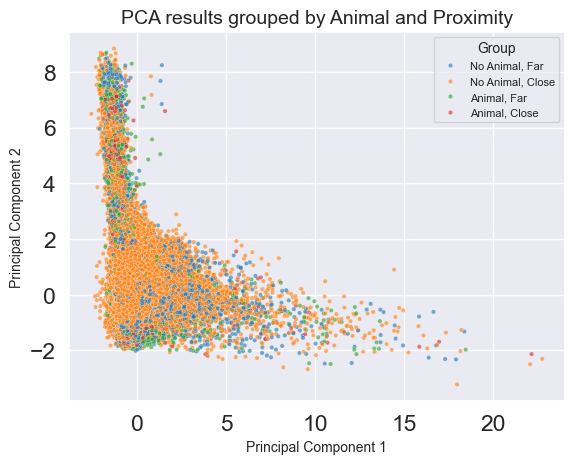

In [148]:
# Create a new column 'combined_group' based on the mapping of 'animal_in_image' and 'close_proximity'
cleaned_data['combined_group'] = cleaned_data['animal_in_image'].map({0: 'No Animal', 1: 'Animal'}) + ', ' + \
                                  cleaned_data['close_proximity'].map({0: 'Far', 1: 'Close'})

# Add jitter to PCA1 and PCA2 for better visualization in scatter plot
cleaned_data['PCA1_jittered'] = cleaned_data['PCA1'] + np.random.uniform(-0.5, 0.5, size=len(cleaned_data))
cleaned_data['PCA2_jittered'] = cleaned_data['PCA2'] + np.random.uniform(-0.5, 0.5, size=len(cleaned_data))

# Plot scatter plot with jittered PCA components and color points by 'combined_group'
sns.scatterplot(x='PCA1_jittered', y='PCA2_jittered', hue='combined_group', data=cleaned_data, s=10, alpha=0.6)

# Set plot title and axis labels
plt.title('PCA results grouped by Animal and Proximity', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=10)
plt.ylabel('Principal Component 2', fontsize=10)

# Update legend labels to show the combination of 'Animal' and 'Proximity' statuses
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['No Animal, Far', 'No Animal, Close', 'Animal, Far', 'Animal, Close']

plt.legend(handles=handles, labels=new_labels, title='Group', fontsize=8, title_fontsize=10)
plt.show()

This principal component analysis reveals patterns in neural, pupil, and movement responses grouped by animal presence and proximity. Due to the high number of data points and their overlap, it is difficult to identify a clear relationship between the responses and animal presence or proximity. Further dimensionality reduction or alternative visualization techniques may help clarify these patterns and better distinguish the influence of these factors.

In [157]:
# Extracting specific columns ('mean_response', 'mean_running_speed', 'mean_pupil_area') from cleaned_data
features = cleaned_data[['mean_response', 'mean_running_speed', 'mean_pupil_area']]

# Printing the first 5 rows of the 'features' DataFrame to inspect the data
print(features.head())

    mean_response  mean_running_speed  mean_pupil_area
85      -0.130054           -0.714691        -0.340665
86      -0.305108           -0.714691        -0.340665
87      -0.462583           -0.714691        -0.340665
88       0.104392           -0.714691        -0.340665
89      -0.219471           -0.714691        -0.340665


In [161]:
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit model and predict clusters
kmeans_labels = kmeans.fit_predict(features)

# Add cluster labels to cleaned_data
cleaned_data['kmeans_cluster'] = kmeans_labels

# Print 'stimulus_presentations_id' and cluster labels
print(cleaned_data[['stimulus_presentations_id', 'kmeans_cluster']])

# Get and print the maximum cluster label
max_cluster_label = cleaned_data['kmeans_cluster'].max()
print(max_cluster_label)

# Print counts of points in each cluster
cluster_counts = cleaned_data['kmeans_cluster'].value_counts()
print(cluster_counts)


         stimulus_presentations_id  kmeans_cluster
85                               5               0
86                               5               0
87                               5               0
88                               5               0
89                               5               0
...                            ...             ...
1709437                       4795               1
1709438                       4795               1
1709439                       4795               1
1709440                       4795               1
1709441                       4795               1

[143112 rows x 2 columns]
2
kmeans_cluster
0    94663
1    47353
2     1096
Name: count, dtype: int64


/var/folders/28/xcnk310j0939tt3vdhk2nypr0000gn/T/ipykernel_97894/399078555.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['kmeans_cluster'] = kmeans_labels


The K-means clustering gave us three clusters that are unbalanced in size: This suggests one dominant response pattern (Cluster 0), a secondary pattern (Cluster 1), and a small, potentially distinct subgroup or noise (Cluster 2). The small size of Cluster 2 may indicate outliers, edge cases, or specific experimental conditions. To improve insights, you could examine the characteristics of each cluster, re-evaluate the optimal number of clusters and ensure the data is properly scaled. 

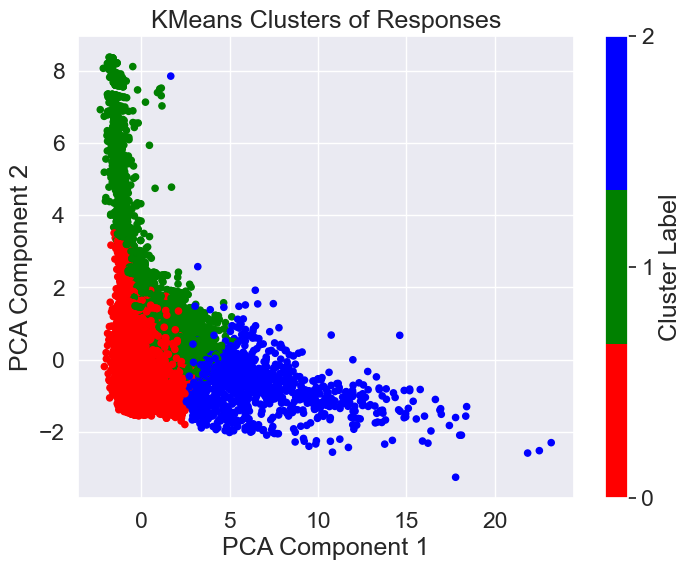

In [198]:
from matplotlib.colors import ListedColormap

# Apply PCA to reduce features to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Define color map for clusters (red, green, blue)
cmap = ListedColormap(['red', 'green', 'blue'])

# Plot the PCA results, coloring points by their cluster label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap=cmap, s=20)

# Title and axis labels
plt.title('KMeans Clusters of Responses')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a colorbar with cluster labels
cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.set_label('Cluster Label')

plt.show()

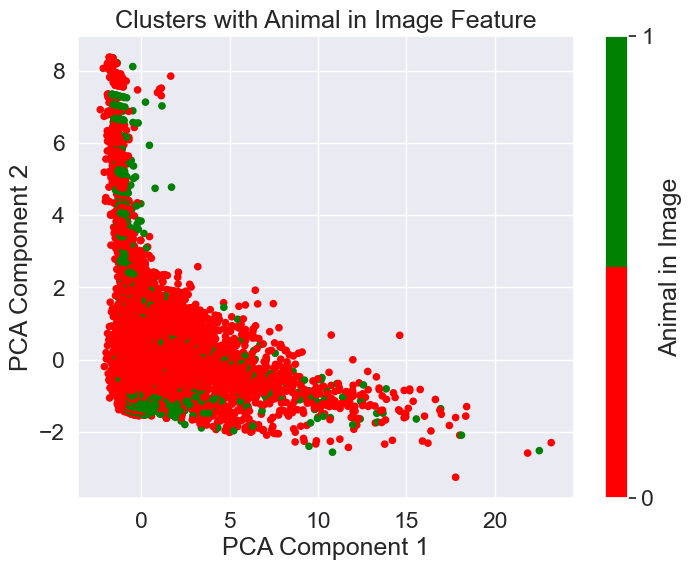

In [202]:
from matplotlib.colors import ListedColormap

# Apply PCA to reduce features to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Define color map for 'animal_in_image' (red for 0, green for 1)
cmap = ListedColormap(['red', 'green'])

# Plot the PCA results, coloring points by 'animal_in_image'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cleaned_data['animal_in_image'], cmap=cmap, s=20)

# Title and axis labels
plt.title('Clusters with Animal in Image Feature')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a colorbar with 'animal_in_image' labels
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label('Animal in Image')

plt.show()

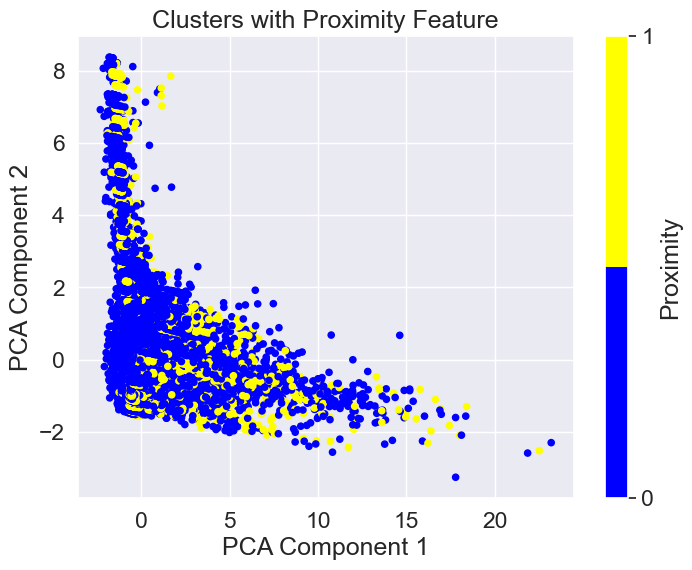

In [203]:
from matplotlib.colors import ListedColormap

# Apply PCA to reduce features to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Define color map for 'close_proximity' (blue for 0, yellow for 1)
cmap = ListedColormap(['blue', 'yellow'])

# Plot the PCA results, coloring points by 'close_proximity'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cleaned_data['close_proximity'], cmap=cmap, s=20)

# Title and axis labels
plt.title('Clusters with Proximity Feature')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a colorbar with 'close_proximity' labels
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label('Proximity')

plt.show()

Combining these two clusters attempts to provide a clearer overview of the data by reducing complexity and highlighting shared patterns. This approach can help simplify interpretation and make it easier to identify broader trends while maintaining essential information about the relationships between responses and experimental conditions.

/var/folders/28/xcnk310j0939tt3vdhk2nypr0000gn/T/ipykernel_97894/2033649112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['pca1'] = X_pca[:, 0]
/var/folders/28/xcnk310j0939tt3vdhk2nypr0000gn/T/ipykernel_97894/2033649112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['pca2'] = X_pca[:, 1]
/var/folders/28/xcnk310j0939tt3vdhk2nypr0000gn/T/ipykernel_97894/2033649112.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

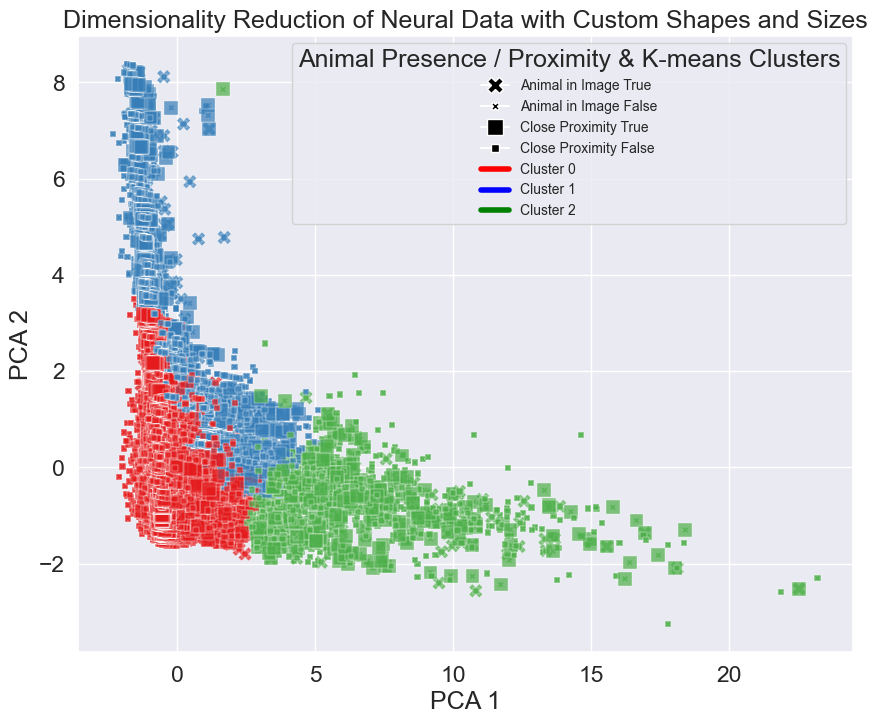

In [223]:
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib.pyplot as plt

# Add PCA components to cleaned data
cleaned_data['pca1'] = X_pca[:, 0]
cleaned_data['pca2'] = X_pca[:, 1]

# Set size based on the presence of animal and proximity
cleaned_data['size_animal'] = cleaned_data['animal_in_image'].apply(lambda x: 200 if x == 1 else 40)  # Larger if animal_in_image == 1
cleaned_data['size_proximity'] = cleaned_data['close_proximity'].apply(lambda x: 200 if x == 1 else 40)  # Larger if close_proximity == 1

# Plot the data with custom shapes and sizes
plt.figure(figsize=(10, 8))

# Scatter plot for 'animal_in_image' with 'X' marker and size based on 'animal_in_image'
sns.scatterplot(
    data=cleaned_data,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',  # Color by kmeans clusters
    style='animal_in_image',  # Shape based on 'animal_in_image'
    markers={0: 'X', 1: 'X'},  # 'X' for both
    size='size_animal',  # Size based on 'animal_in_image'
    sizes=(20, 100),  # Size range
    palette='Set1',  # Custom color palette for clusters
    legend=False,       # Disable default legend
    alpha=0.7           # Transparency
)

# Scatter plot for 'close_proximity' with 'square' marker and size based on 'close_proximity'
sns.scatterplot(
    data=cleaned_data,
    x='pca1',
    y='pca2',
    hue='kmeans_cluster',  # Color by kmeans clusters
    style='close_proximity',  # Shape based on 'close_proximity'
    markers={0: 's', 1: 's'},  # Square for both
    size='size_proximity',  # Size based on 'close_proximity'
    sizes=(20, 100),  # Size range
    palette='Set1',  # Custom color palette for clusters
    legend=False,       # Disable default legend
    alpha=0.7           # Transparency
)

# Manually create custom legend handles for shapes and sizes
animal_in_image_legend = [
    mlines.Line2D([0], [0], marker='X', color='w', label='Animal in Image True', markerfacecolor='black', markersize=8),  # Animal in Image True
    mlines.Line2D([0], [0], marker='X', color='w', label='Animal in Image False', markerfacecolor='black', markersize=4),  # Animal in Image False
]

close_proximity_legend = [
    mlines.Line2D([0], [0], marker='s', color='w', label='Close Proximity True', markerfacecolor='black', markersize=8),  # Close Proximity True
    mlines.Line2D([0], [0], marker='s', color='w', label='Close Proximity False', markerfacecolor='black', markersize=4)  # Close Proximity False
]

# KMeans cluster legend handles
cluster_legend = [
    mlines.Line2D([0], [0], color='red', lw=4, label='Cluster 0'),  # Cluster 0 (red)
    mlines.Line2D([0], [0], color='blue', lw=4, label='Cluster 1'),  # Cluster 1 (blue)
    mlines.Line2D([0], [0], color='green', lw=4, label='Cluster 2')   # Cluster 2 (green)
]

# Combine all legend handles into a single legend
plt.legend(
    title='Animal Presence / Proximity & K-means Clusters', 
    handles=animal_in_image_legend + close_proximity_legend + cluster_legend,  # Merge all legends
    loc='upper right',  # Position the legend
    fontsize=10,  # Font size for legend
    markerscale=1.5  # Adjust the marker size in the legend
)

# Customize plot title and labels
plt.title("Dimensionality Reduction of Neural Data with Custom Shapes and Sizes")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)  # Enable grid

# Show the plot
plt.show()

PCA and K-means clustering illustrate neural data grouped by animal presence and proximity in the images. Different shapes, sizes and colors are used to represent the clusters. As can be seen in the graph, mice response patterns separate into clusters, however it is not clearly visible if this behavior is based on image content and spatial context. 

Lets try to train an MLP on the sst neuron traces where we try to predict if an animal is in the picture of the experiment. This might not yield significant results as there are a lot of different neurons imaged but lets see if we can still get some results.
But first lets compare the neural response of vip neurons to sst neurons.

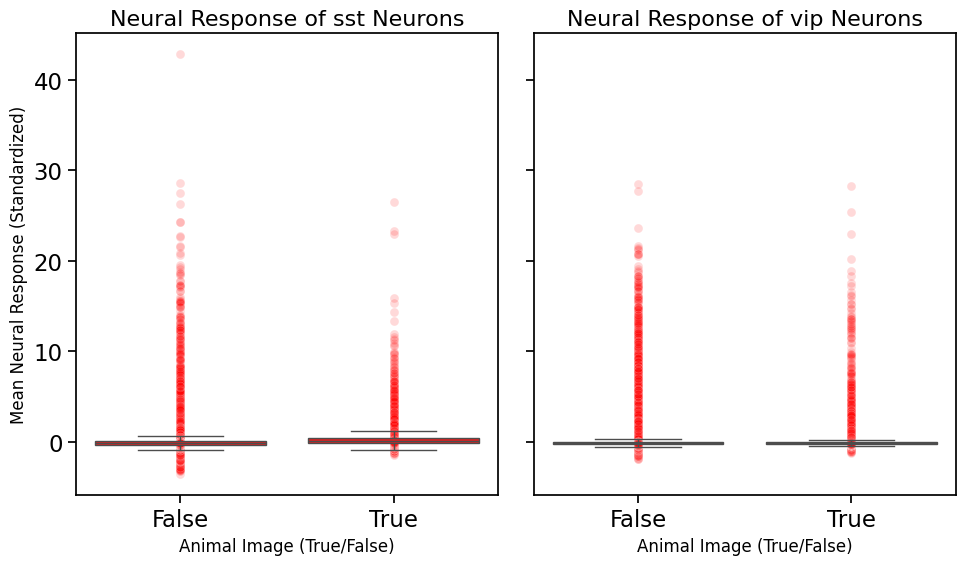

sst Neurons Statistics:
                 count      mean    median       std
animal_in_image                                     
False            46808 -0.078197 -0.157190  0.986179
True             12673  0.288821  0.051803  0.997730

vip Neurons Statistics:
                 count      mean    median       std
animal_in_image                                     
False            74208  0.001748 -0.169160  0.990003
True             14006 -0.009263 -0.158531  1.051371


In [402]:
usesst_data = data[(data.cre_line == 'Sst-IRES-Cre')]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')]

temp_sst_data = sst_data.copy()
temp_sst_data[numeric_columns] = (temp_sst_data[numeric_columns] - temp_sst_data[numeric_columns].mean()) / temp_sst_data[numeric_columns].std()

temp_vip_data = vip_data.copy()
temp_vip_data[numeric_columns] = (temp_vip_data[numeric_columns] - temp_vip_data[numeric_columns].mean()) / temp_vip_data[numeric_columns].std()

fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

sns.boxplot(ax=axes[0], x='animal_in_image', y='mean_response', data=temp_sst_data, color='red', showfliers=False)
sns.scatterplot(ax=axes[0], x='animal_in_image', y='mean_response', data=temp_sst_data, color='red', s=40, alpha=0.15)
axes[0].set_title('Neural Response of sst Neurons', fontsize=16)
axes[0].set_xlabel('Animal Image (True/False)', fontsize=12)
axes[0].set_ylabel('Mean Neural Response (Standardized)', fontsize=12)

sns.boxplot(ax=axes[1], x='animal_in_image', y='mean_response', data=temp_vip_data, color='red', showfliers=False)
sns.scatterplot(ax=axes[1], x='animal_in_image', y='mean_response', data=temp_vip_data, color='red', s=40, alpha=0.15)
axes[1].set_title('Neural Response of vip Neurons', fontsize=16)
axes[1].set_xlabel('Animal Image (True/False)', fontsize=12)

plt.tight_layout()
plt.show()

stats_sst = temp_sst_data.groupby('animal_in_image')['mean_response'].agg(['count', 'mean', 'median', 'std'])
stats_vip = temp_vip_data.groupby('animal_in_image')['mean_response'].agg(['count', 'mean', 'median', 'std'])

print("sst Neurons Statistics:")
print(stats_sst)

print("\nvip Neurons Statistics:")
print(stats_vip)


In [403]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#get data from inhibitory sst neurons
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')]
#extract traces and their timestamps
traces = sst_data['trace'].copy()
time_stamps = sst_data['trace_timestamps'].copy()
#extract the labels of the data
labels = sst_data['animal_in_image']

#remove the traces measured before the image is shown
traces_at_stim = []
for index,value in time_stamps.items():
    traces_at_stim.append(traces[index][np.where(value == 0)[0].item():])
traces_at_stim = np.array(traces_at_stim)

X = traces_at_stim
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10),  # Two hidden layers with 10 neurons each
                    solver='adam',              
                    random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

#results seem pretty bad as expected, altough the accuracy is good the model is pretty bad at predicting positives, identified by
#the low recall/sensitivity and low f1 score which is calculated through precision and recall
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8010422795662772

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.95      0.88      9352
        True       0.58      0.25      0.35      2545

    accuracy                           0.80     11897
   macro avg       0.70      0.60      0.62     11897
weighted avg       0.77      0.80      0.77     11897


The results are not very good but we can still see a trend in the right direction we just need to work on our input data a little more.

On a side note:
We can still learn something from this as these Results are a pretty good example of why Accuracy of ML Models can sometimes be misleading, since we have a data set which is very unbalanced, we have a lot more images which are not of animals, the model is far better at predicting "false".

Lets try to balance the training data by oversampling the minority class, in our case the class where an animal is in the image. For this we are using SMOTE-Synthetic Minority Oversampling Technique which generates synthetic samples for the minority class.

In [404]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Number of positive labels: %s" %len([y for y in y_resampled if y]))
print("Number of negative labels: %s" %len([y for y in y_resampled if not y]))

Number of positive labels: 46808
Number of negative labels: 46808


Now lets run the MLP again

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6903439436017945

Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.72      0.70      9404
        True       0.70      0.66      0.68      9320

    accuracy                           0.69     18724
   macro avg       0.69      0.69      0.69     18724
weighted avg       0.69      0.69      0.69     18724


As we can see our overall Accuracy decreased significantly which was expected as we balanced the data set the algorithm got much worse at predicting the negative class. The tradeoff is that our minority class now has reasonable precision and recall and we can see that the we now predicted both classes with a solid 70% precision and recall.
Lets compare now to the vip neurons, based on the plot we expect the algorithm to perform worse due to the vip neurons seeming to react less when animals are shown.

In [406]:
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')]
#extract traces and their timestamps
traces = vip_data['trace'].copy()
time_stamps = vip_data['trace_timestamps'].copy()
#extract the labels of the data
labels = vip_data['animal_in_image']

#remove the traces measured before the image is shown
traces_at_stim = []
for index,value in time_stamps.items():
    traces_at_stim.append(traces[index][np.where(value == 0)[0].item():])
traces_at_stim = np.array(traces_at_stim)

X = traces_at_stim
y = labels
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6140008085163725

Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.45      0.53     14746
        True       0.59      0.78      0.67     14938

    accuracy                           0.61     29684
   macro avg       0.63      0.61      0.60     29684
weighted avg       0.63      0.61      0.60     29684


As expected the results are slightly worse than the sst data results.

Lets now try to apply this to a more specific dataset, namely the neuron activity of a single mouse. This should work even better as we can look at the exact same neurons over all experiments which should increase the entropy of the dataset significantly.

In [407]:
import re

df = pd.read_csv('data/neural_data/mouse_467953.csv')
traces_raw = df['trace']
time_stamps_raw = df['trace_timestamps']
labels = df['animal_in_image']

In [408]:
#do some ugly string manipulation to extract data from traces
time_stamps = []
for s in time_stamps_raw:
    s = re.sub(' +', ' ',s.replace('[','').replace(']','').replace('\n', '').strip())
    s = list(map(float,s.split(' ')))
    time_stamps.append(s)

traces = []
for t in traces_raw:
    a = []
    t = re.sub(' +',' ',t.replace('\\n', '').replace('[','').replace("'",'').replace(',','')).split(']')
    for ts in t:
        ts=ts.strip()
        ts = ts.split(']')
        for tsr in ts:
            if(tsr != ''):
             tsr = list(map(float,tsr.split(' ')))
             a.append(tsr)
    traces.append(a)
traces = np.array(traces_t)
print("Number of experiments: %s" %len(traces))
print("Number of Neurons: %s" %len(traces[0]))

Number of experiments: 830
Number of Neurons: 13


Now we have an array for one mouse where each entry represents one experiment, each experiment is another array containing the trace values for one specific neuron.
Now lets remove the neuron traces measured before stimulus onset like we did before

In [409]:
traces_at_stim = []
#(830,85) <- index
for index in np.ndindex(len(traces)):
    n = []
    for neuron in traces[index]:
        #print(neuron[time_stamps[index[0]].index(0.0):])
        n.append(np.array(neuron[time_stamps[index[0]].index(0.0):]))
    traces_at_stim.append(n)
traces_at_stim = np.array(traces_at_stim)

For our model to work we now need to aggregate the neuron values, lets for now choose the mean as aggregation function

In [411]:
mean_traces = []
for experiment in traces_at_stim:
    mean_traces.append((np.mean(experiment, axis=1)))
mean_traces = np.array(mean_traces)


So lets train our MLP again

In [412]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(mean_traces, labels)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10),  # Two hidden layers with 10 neurons each
                    solver='lbfgs',              
                    random_state=1, max_iter=10000)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7561837455830389

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.66      0.72       135
        True       0.73      0.84      0.78       148

    accuracy                           0.76       283
   macro avg       0.76      0.75      0.75       283
weighted avg       0.76      0.76      0.75       283


As we can see the data for a single mouse are even better for training the mlp. With a more sophisticated aggregation function for the neurons like max projection and some fine tuning to the algorithm we can probably get a decent model from this data.

##### Available data includes:
*   The cell `trace` aligned to stimulus (or omission) onset in a [-1.25, 1.5] second window around onset time
    *   Cell traces are in units of delta F/F, the change in fluorescence relative to baseline
*   The `trace_timestamps` for each trial, aligned to stimulus or omission onset
*   The `mean_response` on a given trial in a 500ms window after stimulus onset
*   The `baseline_response` on a given trial in a 500ms window before stimulus onset
*   The `image_name` for each trial. Trials where the stimulus was omitted have `image_name` = `omitted`
*   The `mean_running_speed` in a 500ms window after stimulus onset
*   The `mean_pupil_area` in a 500ms window after stimulus onset
*   The `response_latency` when the mouse licked after stimulus onset
*   Whether or not the trial was `rewarded`
*   Whether or not the trial `is_change`
*   Whether or not the trial was `omitted`

#### Cell and session level metadata includes:

*   The `stimulus_presentations_id` indicating the trial number within the session
*   The `cell_specimen_id` which is the unique identifier for each cell (note that a cell can be imaged in multiple sessions; if that's the case, the same cell_specimen_id appears in multiple sessions)
*   The `cre_line` indicating the cell type
  *   `Sst-IRES-Cre` labels SST inhibitory cells
  *   `Vip-IRES-Cre` labels VIP inhibitory cells
  *   `Slc17a7-IRES-Cre` labels excitatory cells
*   The `imaging_depth` indicating the cortical depth where the cell was located
*   The `targeted_structure` indicating the cortical area the cell was from
*   The `session_type` indicating the session order and image set
*   The `exposure_level` which tells you whether the image set was familiar or novel
*   The `mouse_id` indicating which mouse the cell came from
*   The `ophys_session_id` indicating the recording day for that trial
*   The `ophys_experiment_id` indicating which imaging plane within the session that the cell came from
*   The `ophys_container_id` which links the same imaging plane recorded across multiple sessions. Cells that are imaged across multiple sessions will have the same `cell_specimen_id`.




### Let's check what is available


In [ ]:
print('exposure_levels:', data.mean_response)

In [ ]:
print('stimulus presentations can be changes:', data.is_change.unique())

In [ ]:
print('stimulus presentations can be omitted:', data.omitted.unique())

In [ ]:
print('cre lines (cell types) included in this dataset are:', data.cre_line.unique())

In [ ]:
print('there are', len(data.mouse_id.unique()), 'mice in this dataset')

In [ ]:
print('there are', len(data.ophys_session_id.unique()), 'sessions in this dataset')


# How are VIP and SST cells affected by stimulus novelty?

### Plot the population average change response for familiar and novel images for each cre line

Get trials where the image identity changed, for SST and VIP cells

In [ ]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.is_change == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.is_change == True)]

Plot the population average change response of SST cells for familiar and novel images

In [ ]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot the population average change response of VIP cells for familiar and novel images

In [ ]:
timestamps = vip_data.trace_timestamps.values[0]
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### Can you find cells that were imaged across multiple sessions? How do single cells change depending on the image set?

In [ ]:
# which cells are in more than one session? make a list
cells_in_multiple_sessions = []
for cell_specimen_id in vip_data.cell_specimen_id.unique():
  if len(vip_data[vip_data.cell_specimen_id == cell_specimen_id].ophys_session_id.unique()) > 1:
    cells_in_multiple_sessions.append(cell_specimen_id)

print(cells_in_multiple_sessions)

In [ ]:
# this one looks like the population average
example_cell_specimen_id = cells_in_multiple_sessions[6]

cell_data = vip_data[vip_data.cell_specimen_id == example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0]
for exposure_level in cell_data.exposure_level.unique():
  mean_trace = cell_data[cell_data.exposure_level == exposure_level].trace.mean()
  plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

In [ ]:
# this one does not look like the population average
example_cell_specimen_id = cells_in_multiple_sessions[0]

cell_data = vip_data[vip_data.cell_specimen_id==example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0]
for exposure_level in cell_data.exposure_level.unique():
  mean_trace = cell_data[cell_data.exposure_level == exposure_level].trace.mean()
  plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### What about trial to trial variability? How does the response of a single cell vary across a session?



In [ ]:
# let's pick a cell from a novel image session
example_cell_specimen_id = vip_data[vip_data.exposure_level=='novel'].cell_specimen_id.unique()[7]

cell_data = vip_data[vip_data.cell_specimen_id == example_cell_specimen_id]
cell_data = cell_data[(cell_data.image_name == cell_data.image_name.unique()[2])]

offset = 1 / len(cell_data.stimulus_presentations_id.unique())
color = [0, 0, 0]

for i, stimulus_presentations_id in enumerate(cell_data.stimulus_presentations_id.unique()):
  trial_data = cell_data[cell_data.stimulus_presentations_id == stimulus_presentations_id]
  timestamps = trial_data.trace_timestamps.values[0]
  trace = trial_data.trace.values[0]
  plt.plot(timestamps, trace, color = color)
  color = [color[0] + offset, color[1] + offset, color[2] + offset]
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.show()

# How do SST and VIP cells respond when stimuli are omitted?¶

### Plot the population average response to stimulus omission

Get trials where the stimulus was omitted, for SST and VIP cells

In [ ]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.omitted == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.omitted == True)]

Plot the population average omission response of SST cells for familiar and novel images

In [ ]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot population average omission response of VIP cells for familiar and novel images

In [ ]:
timestamps = vip_data.trace_timestamps.values[0]  # trace timestamps are relative to stimulus onset
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Does the omission response correlate with behavior?

How do the dynamics of image and omission evoked activity change over time during the novel image session?

<h2>Related Work</h2>

More in depth research on very similar data was done by -- <cite>[Bryan M. Li et al.][1]</cite>, their main objective was to reveal fundamental mechanisms of learning by trying to understand how activity in neural circuits reshape
following task learning. In other words they recorded the neuronal activities from the primary visual cortex of behaving mice during the entire learning process. 

The experiment itself is very similar to ours, they are using a head-fixed mice placed on a linear treadmill. The setup included a lick spout and two monitors displaying a virtual corridor with defined grating patterns.
 Mice were rewarded with water for licking at a predefined location (120-140 cm) marked by a black screen. This setup required the mice to integrate visual cues and self-motion feedback to maximize
rewards. 

They used CycleGAN which is a GAN-based unsupervised framework that learns the mapping between two unpaired distributions X and Y. In this case X and Y would be the pre- and post-learning
neural activity. The mapping between these two distributions then reveals some fundamental mechanisms of learning. The machine learning techniques used are of course much more complex than the ones
we can implement in this project or even explain in depth so for further reading please consult the original paper -- <cite>[Bryan M. Li et. al][1]</cite>.

[1]: https://arxiv.org/pdf/2111.


### To learn how to use the AllenSDK to access the full dataset, and see more in depth examples of how to interact with the data, check out the additional tutorials here:

https://colab.research.google.com/drive/1ACWR4z-B_ODyGWSErmmcKZHJRuqXTwvt?usp=sharing

and in the 'Getting Started' section here:

https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html


